In [2]:
import matplotlib as mpl
import matplotlib.cm
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import pandas as pd
#from math import *
from datetime import datetime
from matplotlib.transforms import offset_copy
from matplotlib.ticker import FormatStrFormatter
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import geopy.distance
from scipy.stats import norm


plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams.update({'font.size': 16})

Index(['iTOW', 'UTC', 'tAcc', 'Lon', 'Lat', 'Height', 'HMSL', 'hAcc', 'vAcc',
       'pDOP', 'numSV', 'velN', 'velE', 'velD', 'gspeed', 'headmot', 'sAcc',
       'headAcc', 'fixType', 'fixOK', 'UTCvalid', 'HPvalid', 'diffCorrected'],
      dtype='object')
2555429078728 nanoseconds


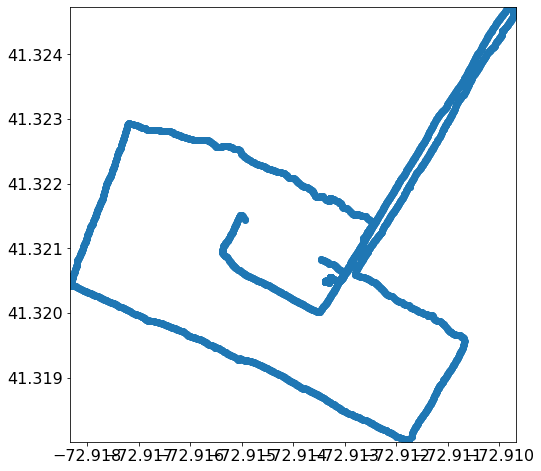

In [3]:
df = pd.read_csv("./12052154",sep=",",header=0)
df = df.assign(UTC = pd.to_datetime(df.UTC))

print(df.columns)
    
#df.reset_index(drop=True, inplace=True)
#df = df[:1100]
fig = plt.figure()
#plt.plot(dfs[2].HMSL)
#df = df[700:950]
plt.scatter(df.Lon, df.Lat)
plt.xlim(min(df.Lon), max(df.Lon))
plt.ylim(min(df.Lat), max(df.Lat))

print(df['UTC'].values[-1]-df['UTC'].values[0])

In [ ]:
MAPBOX_KEY = "pk.eyJ1IjoiYW5uaWVwb2xpc2giLCJhIjoiY2p5b3BwdXl3MTdhdzNjdDRjbGw5MWJ6ciJ9.01NjskBuc2SQcm5QjbyLwA"
MAPBOX_STYLE = "cjypy1k7x0ru71cjva7cs5iwz"
MAPBOX_USERNAME = "anniepolish"
PLOT_BG = cimgt.MapboxStyleTiles(MAPBOX_KEY, MAPBOX_USERNAME, MAPBOX_STYLE)
BORDER = 0.00005

fig = plt.figure()

# add a subplot in the coordinate system of the tiles
ax = fig.add_subplot(1, 1, 1, projection=PLOT_BG.crs) 

# set the extents of the plot to be a box around the data
#ax.set_extent([min(df.Lon)-BORDER, max(df.Lon)+BORDER, min(df.Lat)-BORDER, max(df.Lat)+BORDER], crs=ccrs.Geodetic())

# use cartopy to add a satellite map to the background
#ax.add_image(PLOT_BG, 20, interpolation='spline36')
ax.add_image(PLOT_BG, 12, interpolation='spline36')

# plot the data, transformed into the coordinate system of our plot
plt.plot(df.Lon, df.Lat, 'c', linewidth=2, transform=ccrs.Geodetic(), label="GPS")

# label and save
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig("groundtrack.png")
plt.show()



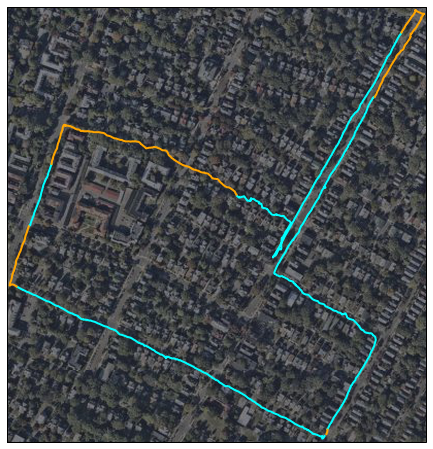

In [103]:
MAPBOX_KEY = "pk.eyJ1IjoiYW5uaWVwb2xpc2giLCJhIjoiY2p5b3BwdXl3MTdhdzNjdDRjbGw5MWJ6ciJ9.01NjskBuc2SQcm5QjbyLwA"
MAPBOX_STYLE = "cjypy1k7x0ru71cjva7cs5iwz"
MAPBOX_USERNAME = "anniepolish"
PLOT_BG = cimgt.MapboxStyleTiles(MAPBOX_KEY, MAPBOX_USERNAME, MAPBOX_STYLE)
BORDER = 0.00005

fig = plt.figure()

# add a subplot in the coordinate system of the tiles
ax = fig.add_subplot(1, 1, 1, projection=PLOT_BG.crs) 

# set the extents of the plot to be a box around the data
ax.set_extent([min(df.Lon)-BORDER, max(df.Lon)+BORDER, min(df.Lat)-BORDER, max(df.Lat)+BORDER], crs=ccrs.Geodetic())

# use cartopy to add a satellite map to the background
#ax.add_image(PLOT_BG, 20, interpolation='spline36')
ax.add_image(PLOT_BG, 16, interpolation='spline36')

old_df = df
df = df[600:-400]

# plot the data, transformed into the coordinate system of our plot
df_diff = df.where(df.diffCorrected == 2)
df_nodiff = df.where(df.diffCorrected == 0)
plt.plot(df_diff.Lon, df_diff.Lat, 'c', linewidth=2, transform=ccrs.Geodetic(), label="GPS", color='cyan')
plt.plot(df_nodiff.Lon, df_nodiff.Lat, 'c', linewidth=2, transform=ccrs.Geodetic(), label="GPS", color='orange')

# label and save
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig("RTK_status.png")
plt.show()


df = old_df

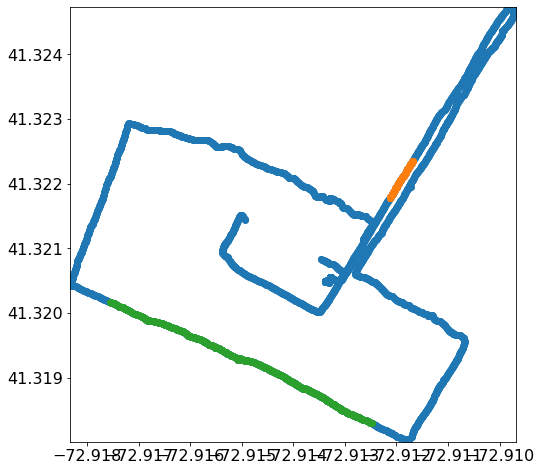

In [63]:
fig = plt.figure()
#plt.plot(dfs[2].HMSL)
df_cut1 = df[750:850]
df_cut2 = df[2700:-1600]
plt.scatter(df.Lon, df.Lat)
plt.scatter(df_cut1.Lon, df_cut1.Lat)
plt.scatter(df_cut2.Lon, df_cut2.Lat)
plt.xlim(min(df.Lon), max(df.Lon))
plt.ylim(min(df.Lat), max(df.Lat))
plt.show()

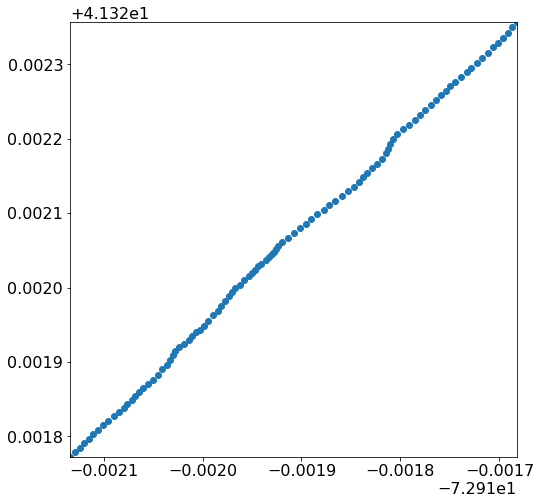

In [64]:
fig = plt.figure()
plt.scatter(df_cut1.Lon, df_cut1.Lat)
plt.xlim(min(df_cut1.Lon), max(df_cut1.Lon))
plt.ylim(min(df_cut1.Lat), max(df_cut1.Lat))
plt.show()

[0.5]
[4399]


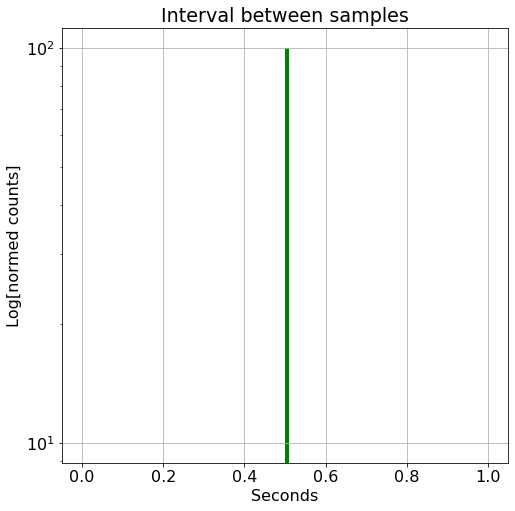

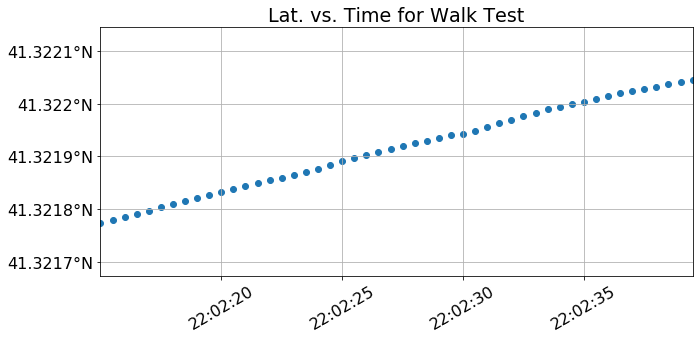

In [88]:
ts_diffs = np.diff(df[100:4500].UTC)
for i in range(len(ts_diffs)):
    ts_diffs[i] = round(ts_diffs[i]/np.timedelta64(1,'s'), 2)

(unique, counts) = np.unique(ts_diffs, return_counts = True)
print(unique)
print(counts)

fig = plt.figure()
n, bins, patches = plt.hist(ts_diffs, 100, density=1, facecolor='green', log=True)
plt.ylabel("Log[normed counts]")
plt.xlabel("Seconds")
plt.grid()
plt.title("Interval between samples")
plt.show()

fig = plt.figure(figsize=(10,5))
ax = plt.gca()

# Format the timestamp on the x axis as HH:MM:SS
ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M:%S"))
ax.xaxis_date()

# Uncomment this line to format a latitude axis
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER); ax.yaxis.set_minor_formatter(LATITUDE_FORMATTER)

# Uncomment this line to format a longitude axis 
#ax.yaxis.set_major_formatter(LONGITUDE_FORMATTER); ax.yaxis.set_minor_formatter(LONGITUDE_FORMATTER)

plt.title("Lat. vs. Time for Walk Test")
trim_start = 750
trim_stop = 800
plt.scatter(df[trim_start:trim_stop].UTC, df[trim_start:trim_stop].Lat)
plt.grid()
plt.xlim(min(df[trim_start:trim_stop].UTC),max(df[trim_start:trim_stop].UTC))
plt.ylim(min(df[trim_start:trim_stop].Lat)-0.0001,max(df[trim_start:trim_stop].Lat)+0.0001)
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("no_more_missing_points.png")
plt.show()

